# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
import patsy
import statsmodels.api as sm
import numpy as np
import itertools

In [2]:
# carrega a base de dados

tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [13]:
# ajustando o modelo

def modelo(formula: str, df):
    
    
    y_m, X_m = patsy.dmatrices(formula, data=df)
    modelo_m = sm.OLS(y_m, X_m).fit()
    #salva os coeficientes e os valores de p associados e o valores de R²
    p_values = modelo_m.pvalues
    coef = modelo_m.params
    r_2_values = modelo_m.rsquared
    
    # cria um df com as informações acima
    df = pd.DataFrame({'coef': coef, 'p_values': p_values, 'R² values': r_2_values})
    print(df)

In [4]:
formulas = (['tip ~ sex + smoker + time + net_bill', 
             'tip ~ smoker + time + net_bill',
             'tip ~ sex + smoker + time',
             'tip ~ sex + smoker + net_bill',
             'tip ~ time + net_bill',
             'tip ~ smoker + net_bill',
             'tip ~ smoker + time',
             'tip ~ sex + smoker',
             'tip ~ sex + net_bill',
             'tip ~ smoker',
             'tip ~ time',
             'tip ~ net_bill',
             'tip ~ sex'])

for formula in formulas:
    print(formula)
    modelo(formula, tips)

tip ~ sex + smoker + time + net_bill
       coef      p_values  R² values
0  1.199928  1.389032e-06   0.335248
1 -0.003445  9.824382e-01   0.335248
2  0.140475  3.523485e-01   0.335248
3  0.058391  7.287609e-01   0.335248
4  0.099509  5.764964e-22   0.335248
tip ~ smoker + time + net_bill
       coef      p_values  R² values
0  1.197778  1.510610e-07   0.335247
1  0.140536  3.510503e-01   0.335247
2  0.059074  7.205720e-01   0.335247
3  0.099533  2.803185e-22   0.335247
tip ~ sex + smoker + time
       coef      p_values  R² values
0  2.826715  1.420098e-27   0.019056
1 -0.192305  3.081982e-01   0.019056
2  0.000534  9.976601e-01   0.019056
3  0.332451  1.002491e-01   0.019056
tip ~ sex + smoker + net_bill
       coef      p_values  R² values
0  1.238640  2.457761e-08   0.334913
1 -0.013453  9.301877e-01   0.334913
2  0.138310  3.585092e-01   0.334913
3  0.100004  1.285607e-22   0.334913
tip ~ time + net_bill
       coef      p_values  R² values
0  1.301460  8.290333e-11   0.332828
1  

A varíavel net_bill é que possui melhor descrição, e pode ser usada sozinha.

<AxesSubplot:xlabel='net_bill'>

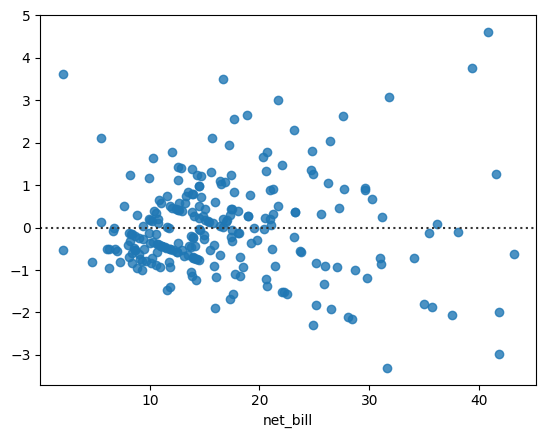

In [5]:
y, X = patsy.dmatrices('tip ~ net_bill', data=tips)
modelo = sm.OLS(y, X).fit()

# usando residplot
sns.residplot(data=tips, x='net_bill', y=modelo.resid)

In [8]:
formulas = ['tip ~ np.log(net_bill)', 'tip ~ net_bill + np.power(net_bill,2)']

for formula in formulas:
    print(formula)
    modelo(formula, tips)

tip ~ np.log(net_bill)
       coef      p_values  R² values
0 -1.257482  3.778800e-03   0.294441
1  1.569520  4.399804e-20   0.294441
tip ~ net_bill + np.power(net_bill,2)
       coef  p_values  R² values
0  1.074262  0.002631   0.334422
1  0.128847  0.000569   0.334422
2 -0.000691  0.410043   0.334422


O ajuste de net_bill por polinômios fornece um R² melhor que o do log. Porém, a variável sem ajustes já é suficiente para explicar.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip_pct```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [9]:
# restringindo os valores de até 70% para a porcentagem

tips_1 = tips[tips['tip_pct'] <= 0.7]

In [10]:
formulas = (['tip_pct ~ sex + smoker + time + net_bill', 
             'tip_pct ~ smoker + time + net_bill',
             'tip_pct ~ sex + smoker + time',
             'tip_pct ~ sex + smoker + net_bill',
             'tip_pct ~ time + net_bill',
             'tip_pct ~ smoker + net_bill',
             'tip_pct ~ smoker + time',
             'tip_pct ~ sex + smoker',
             'tip_pct ~ sex + net_bill',
             'tip_pct ~ smoker',
             'tip_pct ~ time',
             'tip_pct ~ net_bill',
             'tip_pct ~ sex'])

for formula in formulas:
    print(formula)
    modelo(formula, tips_1)

tip_pct ~ sex + smoker + time + net_bill
       coef      p_values  R² values
0  0.252447  4.033981e-49   0.190988
1  0.004790  5.770744e-01   0.190988
2 -0.002809  7.352001e-01   0.190988
3  0.001937  8.336246e-01   0.190988
4 -0.003734  6.948451e-12   0.190988
tip_pct ~ smoker + time + net_bill
       coef      p_values  R² values
0  0.255424  1.269196e-55   0.189924
1 -0.002884  7.280778e-01   0.189924
2  0.000981  9.136615e-01   0.189924
3 -0.003766  3.373084e-12   0.189924
tip_pct ~ sex + smoker + time
       coef      p_values  R² values
0  0.190761  2.413603e-42   0.012956
1  0.011655  2.160890e-01   0.012956
2  0.003589  6.933968e-01   0.012956
3 -0.008949  3.726308e-01   0.012956
tip_pct ~ sex + smoker + net_bill
       coef      p_values  R² values
0  0.253692  1.027457e-56   0.190838
1  0.004455  5.968660e-01   0.190838
2 -0.002862  7.297874e-01   0.190838
3 -0.003716  4.280847e-12   0.190838
tip_pct ~ time + net_bill
       coef      p_values  R² values
0  0.253243  6.46958

<AxesSubplot:xlabel='net_bill'>

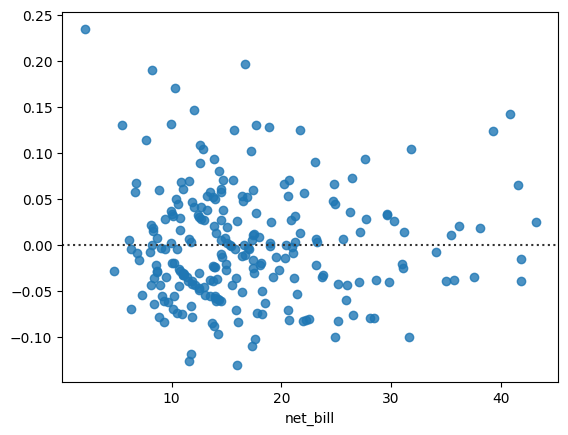

In [11]:
y, X = patsy.dmatrices('tip_pct ~ smoker + net_bill', data=tips_1)
modelo = sm.OLS(y, X).fit()

# usando residplot
sns.residplot(data=tips_1 , x='net_bill', y=modelo.resid)

In [14]:
formulas = ['tip_pct ~ np.log(net_bill)', 'tip_pct ~ net_bill + np.power(net_bill,2)']

for formula in formulas:
    print(formula)
    modelo(formula, tips_1)

tip_pct ~ np.log(net_bill)
       coef      p_values  R² values
0  0.381804  1.386288e-40   0.221048
1 -0.070160  1.033524e-14   0.221048
tip_pct ~ net_bill + np.power(net_bill,2)
       coef      p_values  R² values
0  0.293224  3.584970e-35   0.205885
1 -0.008210  9.856445e-05   0.205885
2  0.000104  2.714734e-02   0.205885


O modelo log se saiu melhor.

<AxesSubplot:xlabel='net_bill'>

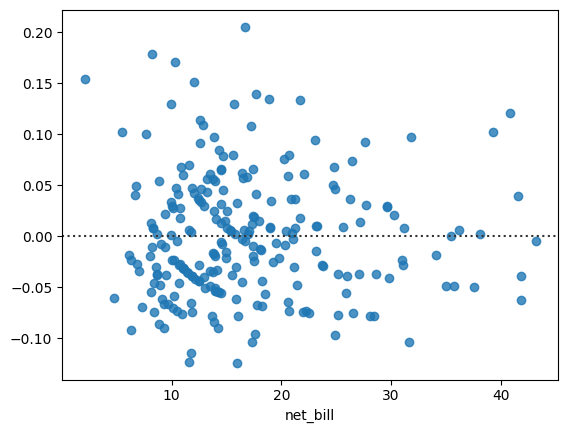

In [15]:
y, X = patsy.dmatrices('tip_pct ~ np.log(net_bill)', data=tips_1)
modelo = sm.OLS(y, X).fit()

# usando residplot
sns.residplot(data=tips_1, x='net_bill', y=modelo.resid)

In [16]:
print(f'R² do modelo com log: {modelo.rsquared: .2f}')

R² do modelo com log:  0.22


O modelo que usa a tip como variável resposta possui um R² maior.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [17]:
# Checa se há dados faltantes

def missing_values(df) -> None:
    
    
    if True in df.isna().any().to_list():
        print('Porcentagem de valores faltantes nas seguintes colunas: \n')
        missing_perc = 100 * df.isna().mean()
        print(missing_perc)
    else:
        print('Não há valores faltantes.')
    
    return None

# checa se há duplicatas

def duplicated_values(df) -> None:
    
    
    if df.shape[0] == df.drop_duplicates().shape[0]:
        print('Não há duplicatas. \n')
    else:
        num_duplicates = df.duplicated().sum()
        print(f'Número de duplicatas: {num_duplicates}')
        print(f'Porcentagem de dados únicos: {round(100*(1-num_duplicates/df.shape[0]), 2)}% \n')
    
    
    return None

# confere o tipo de dados presentes na base pré-tratamento

def data_type(df) -> None:
    
    print(f'Shape: {df.shape} \n')
    
    # Seleciona colunas numéricas
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
    print('\nColunas numéricas:')
    print(f'{num_cols}\n')
    
    # Seleciona colunas categóricas
    cat_cols = df.select_dtypes(include=['object', 'category', 'datetime64[ns]']).columns.to_list()
    print('\nColunas categóricas:')
    print(f'{cat_cols} \n')
    
    # Seleciona colunas bool
    bool_cols = df.select_dtypes(include=['bool']).columns.to_list()
    print('\nColunas booleanas:')
    print(f'{bool_cols} \n')
    
    
    return None

# Checa dados preliminares da base de dados

def checking_base(df) -> None:
    
    
    data_type(df)
    
    print('Checagem de duplicatas:')
    duplicated_values(df)
     
    missing_values(df)
    
    return None

In [18]:
previsao_renda_df = pd.read_csv('previsao_de_renda.csv').drop(columns=['Unnamed: 0', 'sexo', 'index'])

In [19]:
checking_base(previsao_renda_df)

Shape: (15000, 13) 


Colunas numéricas:
['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']


Colunas categóricas:
['data_ref', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'] 


Colunas booleanas:
['posse_de_veiculo', 'posse_de_imovel', 'mau'] 

Checagem de duplicatas:
Número de duplicatas: 453
Porcentagem de dados únicos: 96.98% 

Porcentagem de valores faltantes nas seguintes colunas: 

data_ref                  0.000000
posse_de_veiculo          0.000000
posse_de_imovel           0.000000
qtd_filhos                0.000000
tipo_renda                0.000000
educacao                  0.000000
estado_civil              0.000000
tipo_residencia           0.000000
idade                     0.000000
tempo_emprego            16.893333
qt_pessoas_residencia     0.000000
mau                       0.000000
renda                     0.000000
dtype: float64


Pela análise acima, temos que excluir os dados faltantes.

In [20]:
previsao_renda_df.dropna(subset=['tempo_emprego'], inplace=True)

Checando novamente.

In [21]:
checking_base(previsao_renda_df)

Shape: (12466, 13) 


Colunas numéricas:
['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']


Colunas categóricas:
['data_ref', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'] 


Colunas booleanas:
['posse_de_veiculo', 'posse_de_imovel', 'mau'] 

Checagem de duplicatas:
Número de duplicatas: 379
Porcentagem de dados únicos: 96.96% 

Não há valores faltantes.


In [22]:
# criando um dataset com as variáveis dummies
prev_renda_dummies_df = pd.get_dummies(data=previsao_renda_df,
                                      columns=['posse_de_veiculo', 'posse_de_imovel'],
                                      prefix=['veiculo', 'imovel'],
                                      drop_first=True)

Cria uma lista de variáveis explicativas para renda

A seguir é utilizado as combinações acima para o ajuste dos modelos.

In [30]:
# Define a variavel resposta
resposta = 'renda'

# Define as variaveis explicatorias
var_expla = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']

# Gera uma combinação das variaveis explicatorias
combinacoes = []
for r in range(1, len(var_expla) + 1):
    combinacoes += list(itertools.combinations(var_expla, r))

# Fita o modelo para cada combinacao
respostas = {}
for combinacao in combinacoes:
    formula = resposta + ' ~ ' + ' + '.join(combinacao)
    model = sm.formula.ols(formula=formula, data=prev_renda_dummies_df).fit()
    respostas[combinacao] = model

# Mostra o resultado na tela
for combi, model in respostas.items():
    print('Model with variables:', combi)
    print(f'R-squared: {model.rsquared: .2f}')
    print(f'p-values: \n{model.pvalues}\n')


Model with variables: ('qtd_filhos',)
R-squared:  0.00
p-values: 
Intercept     0.000000
qtd_filhos    0.070697
dtype: float64

Model with variables: ('idade',)
R-squared:  0.02
p-values: 
Intercept    1.520836e-17
idade        8.750975e-65
dtype: float64

Model with variables: ('tempo_emprego',)
R-squared:  0.16
p-values: 
Intercept        0.0
tempo_emprego    0.0
dtype: float64

Model with variables: ('qt_pessoas_residencia',)
R-squared:  0.00
p-values: 
Intercept                0.000000
qt_pessoas_residencia    0.587008
dtype: float64

Model with variables: ('qtd_filhos', 'idade')
R-squared:  0.02
p-values: 
Intercept     9.371890e-11
qtd_filhos    1.147321e-03
idade         2.264978e-66
dtype: float64

Model with variables: ('qtd_filhos', 'tempo_emprego')
R-squared:  0.16
p-values: 
Intercept        1.343176e-307
qtd_filhos        1.109886e-01
tempo_emprego     0.000000e+00
dtype: float64

Model with variables: ('qtd_filhos', 'qt_pessoas_residencia')
R-squared:  0.00
p-values: 
Int

Ao inspecionar os resultados acima, vemos que o melhor modelo é com as variáveis explicativas:
* idade
* tempo_emprego

Model with variables: ('idade', 'tempo_emprego')

R-squared:  0.16

p-values: 

Intercept        9.945077e-33

idade            2.380332e-03

tempo_emprego    0.000000e+00
